In [1]:
import lxml
import html5lib
import re
import json
import uuid
import glob
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from gensim import corpora, models, utils
from numpy import array
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from pprint import pprint
from gensim import corpora
import re
from os.path import basename
import string
import logging
import pandas as pd
import numpy as np
import pyLDAvis
from empath import Empath
lexicon = Empath()
import gensim

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



/anaconda/lib/python3.6/site-packages/pandas/core/config.py:615: DeprecationWarning: height has been deprecated.

  warnings.warn(d.msg, DeprecationWarning)


In [27]:
df = pd.read_pickle('aggregatedReddit.pkl')

In [28]:
df.head()

,subreddit,controversiality,downs,gilded,removal_reason,score,ups,throwaway,sleep_l,birth,judgment,postshare,games,unknown1,milestones,dental,work-life,sickness,congratulations,playpark,diaper,vaccine,learnlang,leavechildroom,school,hair-skin-care,unkonwn2,sex-tlk-teens,tantrum,discipline,sleep-better,unknown3,circumcision,pottytrain,teething,income,judge,abuse,toys,travel,diaper2,prepfood,car_seat,kidbooks,smokealc,unknown4,pet,newborn,gift2,faith,fath2,eyecolor,discusscomm,develop,Movie,gamecomp,breastfeed,shopcheap
0,Mommit,0.004817,0.0,0.000099,NaN,3.129805,3.093928,0.001482,0.060401,0.040854,0.075290,0.087538,0.060475,0.096479,0.078570,0.035779,0.083596,0.088249,0.097451,0.072803,0.040867,0.035882,0.014351,0.068815,0.071334,0.048400,0.107667,0.070029,0.087956,0.072970,0.098715,0.098755,0.058636,0.078792,0.094688,0.056572,0.099363,0.058698,0.066539,0.069061,0.049916,0.064174,0.059007,0.064360,0.016570,0.114230,0.068163,0.090183,0.076025,0.095293,0.060599,0.017119,0.040356,0.057809,0.063765,0.059094,0.085513,0.101802
1,Parenting,0.014511,0.0,0.000242,NaN,4.856578,4.715181,0.002735,0.057062,0.036427,0.080229,0.079920,0.065282,0.094383,0.067606,0.034695,0.085992,0.079712,0.077819,0.077595,0.034553,0.038750,0.016060,0.080103,0.075462,0.041978,0.107530,0.073180,0.074543,0.081916,0.086976,0.095539,0.056665,0.075467,0.078313,0.059413,0.109050,0.068289,0.065980,0.068780,0.041431,0.063632,0.059150,0.062894,0.017934,0.119691,0.070579,0.078133,0.080267,0.100711,0.060234,0.015580,0.045874,0.059621,0.064466,0.064282,0.068784,0.094806
2,daddit,0.005113,0.0,0.000306,NaN,3.223496,3.104951,0.001226,0.056853,0.039600,0.078483,0.083835,0.065330,0.100941,0.076070,0.042263,0.083424,0.078607,0.119882,0.072682,0.042389,0.035184,0.013870,0.066895,0.074028,0.048793,0.100590,0.067729,0.081577,0.072808,0.092553,0.098127,0.053234,0.076542,0.085574,0.052862,0.096342,0.056196,0.069600,0.068627,0.046192,0.062685,0.057985,0.068144,0.015737,0.109864,0.075092,0.087632,0.076305,0.100425,0.061273,0.019333,0.037652,0.053636,0.066626,0.065217,0.071938,0.098344


In [29]:
Attempt = df.groupby('subreddit', as_index=False).mean()

In [50]:
Attempt = df[['subreddit', 'milestones', 'sex-tlk-teens','discipline']]

In [51]:
A = Attempt

In [52]:
A

,subreddit,milestones,sex-tlk-teens,discipline
0,Mommit,0.078570,0.070029,0.072970
1,Parenting,0.067606,0.073180,0.081916
2,daddit,0.076070,0.067729,0.072808


In [53]:
X = A[['milestones', 'sex-tlk-teens','discipline']].as_matrix()

In [54]:
X.shape

(3, 3)

In [55]:
Reddits = ['Mommit','Parenting','Daddit']

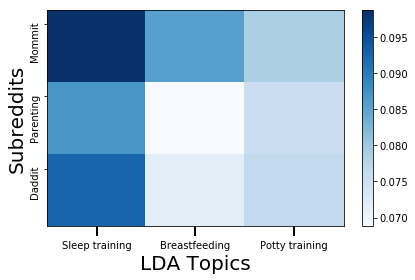

In [41]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()

#X = A

plt.pcolor(X, norm=None, cmap='Blues')

N, K = X.shape

Topics = ['Sleep training', 'Breastfeeding','Potty training']
topic_labels = [k for k in Topics]

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(X.shape[0])+0.2, Reddits, rotation = 90, fontsize = 10);

plt.xticks(np.arange(X.shape[1])+0.5, topic_labels, rotation = 0, fontsize = 10);
plt.ylabel('Subreddits', fontsize=20)
plt.xlabel('LDA Topics', fontsize=20)

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

plt.tick_params('x', length=10, width=2, which='major')

# rotate the ticks on the x-axis
plt.xticks()

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout() 
plt.show()
fig.set_size_inches(15, 15)
fig.savefig('RedditCompare.png')

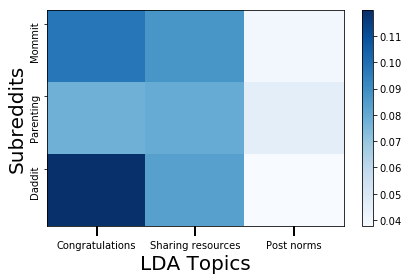

In [49]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()

#X = A

plt.pcolor(X, norm=None, cmap='Blues')

N, K = X.shape

Topics = ['Congratulations', 'Sharing resources','Post norms']
topic_labels = [k for k in Topics]

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(X.shape[0])+0.2, Reddits, rotation = 90, fontsize = 10);

plt.xticks(np.arange(X.shape[1])+0.5, topic_labels, rotation = 0, fontsize = 10);
plt.ylabel('Subreddits', fontsize=20)
plt.xlabel('LDA Topics', fontsize=20)

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

plt.tick_params('x', length=10, width=2, which='major')

# rotate the ticks on the x-axis
plt.xticks()

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout() 
plt.show()
#fig.set_size_inches(15, 15)
fig.savefig('RedditCompareCongSharePost.png')

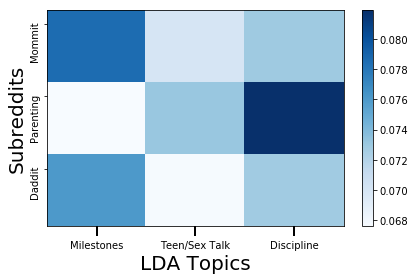

In [56]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()

#X = A

plt.pcolor(X, norm=None, cmap='Blues')

N, K = X.shape

Topics = ['Milestones', 'Teen/Sex Talk','Discipline']
topic_labels = [k for k in Topics]

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(X.shape[0])+0.2, Reddits, rotation = 90, fontsize = 10);

plt.xticks(np.arange(X.shape[1])+0.5, topic_labels, rotation = 0, fontsize = 10);
plt.ylabel('Subreddits', fontsize=20)
plt.xlabel('LDA Topics', fontsize=20)

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

plt.tick_params('x', length=10, width=2, which='major')

# rotate the ticks on the x-axis
plt.xticks()

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout() 
plt.show()
#fig.set_size_inches(15, 15)
fig.savefig('RedditCompareMilestones.png')

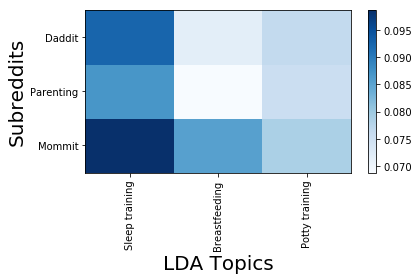

In [40]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()

#X = A

plt.pcolor(X, norm=None, cmap='Blues')

N, K = X.shape

Topics = ['Sleep training', 'Breastfeeding','Potty training']
topic_labels = [k for k in Topics]

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.ylabel('Subreddits', fontsize=20)
plt.xlabel('LDA Topics', fontsize=20)

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()
# rotate the ticks on the x-axis
plt.xticks()

# add a legend
plt.colorbar(cmap='Blues')

plt.yticks(np.arange(X.shape[0])+0.5, Reddits);

plt.xticks(np.arange(X.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend

plt.tight_layout() 
plt.show()


In [10]:
import numpy as np

import matplotlib.pyplot as plt
plt.pcolor(X, norm=None, cmap="Blues")

In [11]:
plt.savefig('firstbluew.png')